In [1]:
import pandas as pd
import numpy as np

In [2]:
cov = pd.read_csv('G:/Meu Drive/Dados/Alfredo/cobertura vacinal/coverage.csv', sep=',', index_col=0,parse_dates=['mes'])
cov

NameError: name 'pd' is not defined

Doses aplicadas por mês entre 2017 e 2022

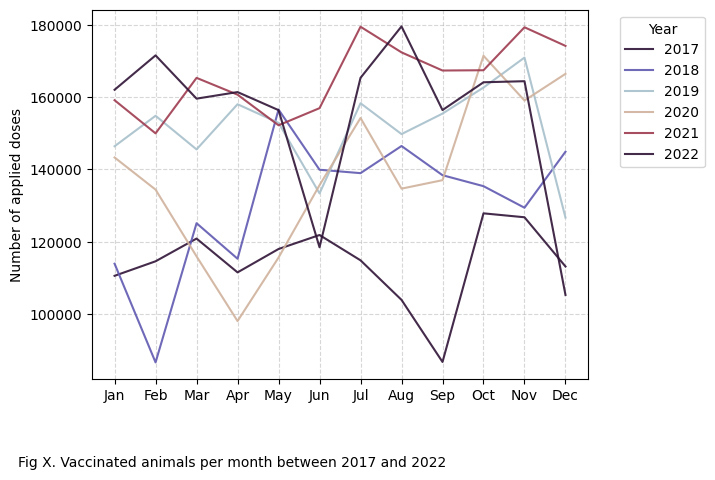

In [97]:
#biblioteca de gráficos
#import matplotlib.pyplot as plt
#biblioteca para paleta de cores
#import matplotlib.cm as cm

#Filtrando apenas dados entre 2017 e 2022
cov_filtered = cov[(cov['mes'].dt.year >= 2017) & (cov['mes'].dt.year <= 2022)]
cov_filtered

# Agrupar por ano e mês e calcular o total de vacinados para cada mês
cov_grouped = cov_filtered.groupby([cov_filtered['mes'].dt.year.rename('year'), cov_filtered['mes'].dt.month.rename('month')])['vacunados'].sum().reset_index()
cov_grouped
# Criar uma figura e um gráfico
fig, ax = plt.subplots()

#Paleta de cores
## Obter uma paleta de cores
cmap = cm.get_cmap('twilight_shifted')
## Obter o número de anos para que cada ano seja uma cor da paleta viridis
num_years = len(cov_grouped['year'].unique())
## Criar sequência de valores no intervalo de 0 a 1, esse intervalo é definido pelos varoles únicos de ano
##Assim, vamos extrair de viridis 'years' valores de cores
values = np.linspace(0, 1, num_years)

#Plotando o gráfico
##Para cada agrupamento de ano em cov_grouped vamos ...
##plotar os valores de 'month' no eixo x e 'vacunados'/1.55 no eixo y
##O label de cada plotagem é o valor de 'year', como string de texto
##As cores das plotagens são dadas por 'years' valores de cores presentes no objeto cmap, 
##que guarda a paleta viridis
for i, (year, group) in enumerate(cov_grouped.groupby('year')):
    ax.plot(group['month'], group['vacunados'] / 1.55, label=str(year), color=cmap(values[i]), linewidth=1.5, alpha=0.7)

#Rótolos dos eixos
ax.set_ylabel('Number of applied doses')

# Alterando os valores do eixo x
ax.set_xticks(range(1, 13))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(months)

# Adicionando grade, com tipo de linha, transparência e sobreposição
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Configurando os tamnho e alpha das linhas
for line in ax.lines:
    line.set_linewidth(1.5)
    line.set_alpha(0.9)
    
# Legenda
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title('Year')

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Vaccinated animals per month between 2017 and 2022', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
plt.savefig('FigX_Historic_doses_per_month.png', dpi=300, bbox_inches='tight')
plt.show()

Doses e média móvel

In [1]:
# Filtrar os dados para o período desejado
df = cov[(cov['mes'] >= '2017-01-01') & (cov['mes'] <= '2022-12-01')]

# Agrupar os dados por mês e calcular os valores resumidos
##Aqui eu mudei o nome das variáveis, para no gráfico o label da legenda já ficar correto
cov_grouped = df.groupby(df['mes'].dt.to_period('M')).agg(
    Applied_doses=('vacunados', 'sum'),
    x_coverage=('vac_cov', 'mean'),
    Mobile_mean=('mov_mean', 'mean')
).reset_index()

# Derreter o DataFrame
cov_melted = pd.melt(cov_grouped, id_vars='mes', value_vars=['Applied_doses', 'Mobile_mean'], var_name='variable', value_name='value')
cov_melted = cov_melted[cov_melted['variable'] != 'vac_cov']

# Criar o gráfico
fig, ax = plt.subplots()

#Paleta de cores
colors = plt.cm.twilight_shifted(np.linspace(0, 1, len(cov_melted['variable'].unique())))

#Plotando a partir de variable, especificando que se variable for Mobile mean, o alpha é 0.9
#se não for, o alpha é 0.4
#Aqui eu poderia escolher cores manualmente também, mas copiei do anterior para usar a mesma paleta
for i, (variable, group) in enumerate(cov_melted.groupby('variable')):
    if variable == 'Mobile_mean':
        ax.plot(group['mes'].dt.to_timestamp(), group['value'], label=variable, color=colors[i], alpha=0.9)
    else:
        ax.plot(group['mes'].dt.to_timestamp(), group['value'], label=variable, color=colors[i], alpha=0.4)

#Definindo rótulos do eixo x só porque 2023 aparecia, embora não hajam dados para 2023
xtick_labels = ['', '2017', '2018', '2019', '2020', '2021', '2022', '']
ax.set_xticklabels(xtick_labels)

#Rótulos dos eixos
ax.set_xlabel('Years')
ax.set_ylabel('Monthly applied doses against CSF')

# Adicionando grade
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Legenda na parte superior esquerda
ax.legend(loc='upper left')

# Adicionado título abaixo do gráfico, fonte 10 a esquerda
fig.suptitle('Fig X. Applied doses and Mobile mean of CSF vaccine between 2017 and 2022', fontsize=10, x=0.01, y=-0.05, ha='left')

# Salvando e visualizando
plt.savefig('FigX_Mobile mean.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'cov' is not defined